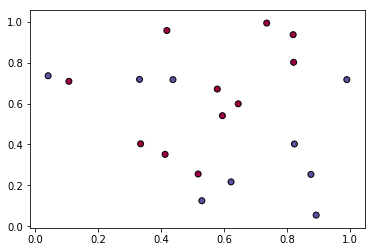

In [103]:
import numpy as np
import matplotlib.pyplot as plt

n = 20 # Size of dataset
o = 2 # No of classes 
m = 2 # Feature vector size
np.random.seed(6)
X = np.random.rand(m,n)
y = np.round(np.random.rand(n)*(o-1)).astype(int) 
Y = np.zeros(shape = (o,X.shape[1]))
Y[y,range(n)] = 1
plt.scatter(X[0,:],X[1,:],c=y[0:],cmap=plt.cm.Spectral,edgecolors='k')

In [104]:
# Neural-net code
h = 70 # Number of hidden layers
W0 = (np.random.rand(h,m))
W1 = (np.random.rand(o,h))
for i in range(10000): # No of epochs
    a1 = 1/(1+np.exp(-np.dot(W0,X)))
    h2 = np.exp(np.dot(W1,a1))
    a2 = np.divide(h2,np.sum(h2,axis=0))
    dW1 = np.dot((a2-Y),a1.T)
    dW0 = np.dot(np.dot(W1.T,(a2-Y))*a1*(1-a1),X.T)
    W1 +=  -dW1/n
    W0 += -dW0/n

    
# Predicting accuracy    
a1 = 1/(1+np.exp(-np.dot(W0,X)))
h2 = np.exp(np.dot(W1,a1))
a2 = np.divide(h2,np.sum(h2,axis=0))  
print 'Accuracy :' , 100 -np.sum(np.abs(np.round(a2) - Y))/n*100,'%'


Accuracy : 100.0 %


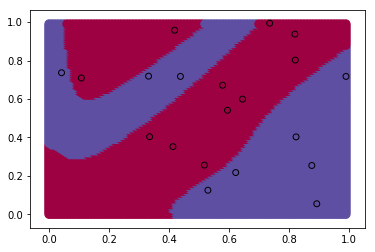

In [105]:
# Plots boundaries of neural nets - Works only for 2D - X matrix
def plotbound(W0,W1,density=100):
    c = density
    x_pl = np.array(range(0,c))/100.0
    y_pl = np.array(range(0,c))/100.0
    xv, yv = np.meshgrid(x_pl, y_pl, sparse=False, indexing='xy')
    xv = xv.reshape(xv.size,1)
    yv = yv.reshape(xv.size,1)

    Data1 = np.concatenate((xv,yv),axis=1).T
    a1 = 1/(1+np.exp(-np.dot(W0,Data1)))
    h2 = np.exp(np.dot(W1,a1))
    a2 = np.divide(h2,np.sum(h2,axis=0))
    col = np.zeros(shape = (c*c))
    
    for i in range(o):
        col[a2[i,:]>=0.5] = i
   
    plt.scatter(Data1[0,:],Data1[1,:],c=col,s=70,cmap=plt.cm.Spectral) 

if m<3 :    
    plotbound(W0,W1)    
    plt.scatter(X[0,:],X[1,:],c=y[0:],cmap=plt.cm.Spectral,s=35,edgecolors='k')
else:
    print 'This section works only for 2-D matrices'    